# Tugas Praktikum 2 - Komputasi Numerik D

## Kelompok 9
- Malvin Leonardo Hartanto (5025221033)
- Mohammad Hanif Furqan Aufa Putra (5025221161)
- Muhammad Alif Satriadhi (5025221188)

#### Problem:
Salah satu kelemahan dari metode Trapezoidal adalah kita harus menggunakan jumlah interval yang besar untuk memperoleh akurasi yang diharapkan. Buatlah sebuah program komputer untuk menjelaskan bagaimana metode Integrasi Romberg dapat mengatasi kelemahan tersebut.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def romberg_integration(f, a, b, eps=1e-6):
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # R[0][0]
    n = 1
    results = [(a, f(a)), (b, f(b))]

    while True:
        h = float(b - a) / 2**n
        sum_f = sum(f(a + (2*k - 1) * h) for k in range(1, 2**(n-1) + 1))
        row = [0.5 * R[n-1][0] + sum_f * h]  # R[n][0]
        for m in range(1, n+1):
            row.append(row[m-1] + (row[m-1] - R[n-1][m-1]) / (4**m - 1))
        results.extend([(a + (2*k - 1) * h, f(a + (2*k - 1) * h)) for k in range(1, 2**(n-1) + 1)])
        if abs(row[-1] - R[n-1][-1]) < eps:
            return row[-1], results
        R.append(row)
        n += 1

In [ ]:
# Function to integrate
def f(x):
    return np.exp(x)

In [ ]:
# Define the interval
a = 0
b = 4

In [ ]:
# Perform Romberg Integration
romberg_result, points = romberg_integration(f, a, b)
print('Hasil integrasi dengan metode Romberg: {}'.format(romberg_result))

Hasil integrasi dengan metode Romberg: 53.59815003342084


In [ ]:
# Prepare data for plotting
x_values = np.linspace(a, b, 100)
y_values = f(x_values)
x_points, y_points = zip(*points)

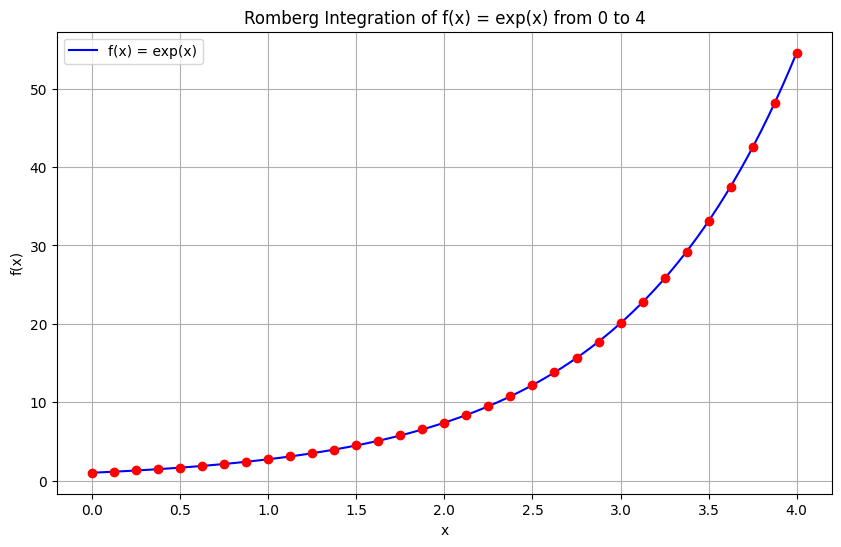

In [ ]:
# Plot the function and the points used in Romberg Integration
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = exp(x)', color='blue')
plt.scatter(x_points, y_points, color='red', zorder=5)
plt.title('Romberg Integration of f(x) = exp(x) from {} to {}'.format(a, b))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Link Google Collab: https://colab.research.google.com/drive/1YgW4aYZ4PIbpntvDb22SvGNqyq71xLXa?usp=sharing

Link untuk Format laporan: https://docs.google.com/document/d/1eJXIp9OvWR6IrADXR7-RaC9xpsdB_leqy5JTcKroCi0/edit